In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Modelling libraries - liner regression,ridege regression, lasso regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
#testing
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
import warnings

In [10]:
X = pd.read_csv('/Users/anuhyasamudrala/Documents/Anu_uncc/mlproject/notebook/data/stud.csv')

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
y = X['math_score']

In [14]:
#hotcoding categerical values 
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
        ("StandardScaler", StandardScaler(), num_features)
    ])

In [15]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 20)

In [16]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [17]:
#list of models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    AdaBoostClassifier: AdaBoostClassifier()
}

In [3]:
#testing the models
def evaluate_model(true , predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true , predicted)
    return mae, mse, r2

In [18]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #train
    
    y_train_pred = model.predict(X_train) #predict
    y_test_pred = model.predict(X_test) #predict
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)  #test
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)#test
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')
    
    
    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0028
- Mean Absolute Error: 0.0426
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0031
- Mean Absolute Error: 0.0442
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9968
- Mean Absolute Error: 0.7948
- R2 Score: 0.9957
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9812
- Mean Absolute Error: 0.7745
- R2 Score: 0.9957


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
------------------------

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'R2 Score']).sort_values(by = 'R2 Score', ascending = False)

,Model,R2 Score
0,LinearRegression,1.000000
1,Ridge,0.999986
4,RandomForestRegressor,0.999577
6,CatBoostRegressor,0.999081
3,DecisionTreeRegressor,0.998455
2,Lasso,0.995670
5,KNeighborsRegressor,0.928905
7,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.167173


In [20]:
#we see that Linear regression has the highest R2 score

#linear regression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model with R2 Score: {score}")

Accuracy of the model with R2 Score: 100.0


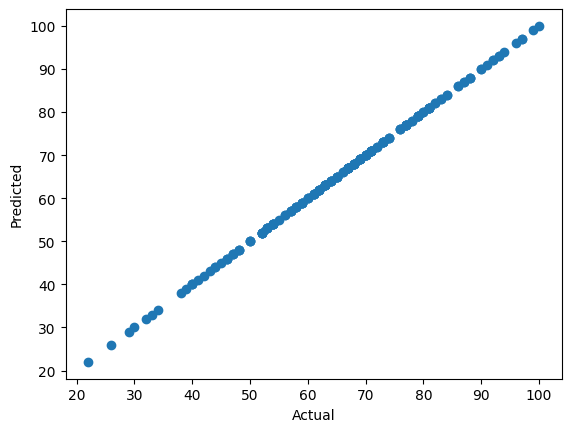

In [23]:
plt.scatter(y_test, y_test)
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [22]:
# # Difference between Actual and Predicted Values
# pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
# pred_df

,Actual Value,Predicted Value,Difference
993,62,62.0,0.000000e+00
859,87,87.0,-2.842171e-14
298,40,40.0,4.973799e-14
553,77,77.0,0.000000e+00
672,69,69.0,-2.842171e-14
...,...,...,...
679,63,63.0,1.421085e-14
722,74,74.0,-5.684342e-14
215,84,84.0,-5.684342e-14
653,65,65.0,-1.421085e-14
